In [1]:
pip install sklearn seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os
from sys import path
from datetime import datetime

In [4]:
file_location = 'BigSupplyCo_Data_Files'
final_loc = os.path.join(os.getcwd(),file_location)

In [5]:
final_loc

'C:\\Users\\myung\\OneDrive\\Desktop\\Datathlons\\Data Open Europe Regional\\BigSupplyCo_Data_Files'

In [6]:
orders = pd.read_csv(os.path.join(final_loc,'BigSupplyCo_Orders.csv'))
customers = pd.read_csv(os.path.join(final_loc,'BigSupplyCo_Customers.csv'))
categories = pd.read_csv(os.path.join(final_loc,'BigSupplyCo_Categories.csv'))
deps = pd.read_csv(os.path.join(final_loc,'BigSupplyCo_Departments_Cleaned.csv'))
products = pd.read_csv(os.path.join(final_loc,'BigSupplyCo_Products.csv'))

#### Joining Datasets for a general one

In [7]:
total_data = pd.merge(left = products,
         right = categories,
        how= 'inner',
        left_on='Product Category Id',
        right_on='Category Id',
        suffixes=('', '_drop')).filter(regex='^(?!.*_drop)').drop(['Product Description', 'Product Image'],axis=1)
total_data = pd.merge(left = orders,
         right = total_data,
        how= 'inner',
        left_on='Order Item Cardprod Id',
        right_on='Product Card Id',
        suffixes=('', '_drop')).filter(regex='^(?!.*_drop)')
total_data = pd.merge(left = total_data,
         right = deps,
        how= 'inner',
        left_on='Order Department Id',
        right_on='Department Id',
        suffixes=('', '_drop')).filter(regex='^(?!.*_drop)')
total_data = pd.merge(left = total_data,
         right = customers,
        how= 'inner',
        left_on='Order Customer Id',
        right_on='Customer Id',
        suffixes=('', '_drop')).filter(regex='^(?!.*_drop)')

In [8]:
total_data['order date (DateOrders)'] = pd.to_datetime(total_data['order date (DateOrders)'],format='%m/%d/%Y %H:%M')

In [9]:
total_data['year'] = total_data['order date (DateOrders)'].dt.year
total_data['month'] = total_data['order date (DateOrders)'].dt.month
total_data['day'] = total_data['order date (DateOrders)'].dt.day
total_data['hour'] = total_data['order date (DateOrders)'].dt.hour

total_data['Customer Full Name'] = total_data['Customer Fname'] + " " + total_data['Customer Lname'].fillna('')

In [10]:
drop_cols = ['Customer Password', 'Customer Email','order date (DateOrders)','Customer Zipcode','Customer Street','Latitude','Longitude']
total_data.drop(drop_cols,axis = 1,inplace=True)

## EDA

<AxesSubplot:>

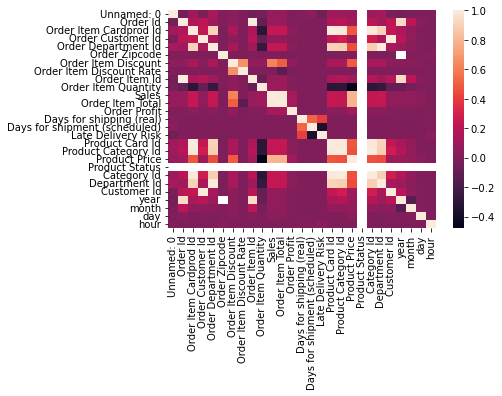

In [11]:
sns.heatmap(total_data.corr(),xticklabels=True,yticklabels=True)

In [12]:
orders.head()

,Unnamed: 0,Order Id,Order Item Cardprod Id,Order Customer Id,Order Department Id,Market,Order City,Order Country,Order Region,Order State,...,Order Item Id,Order Item Quantity,Sales,Order Item Total,Order Profit,Type,Days for shipping (real),Days for shipment (scheduled),Delivery Status,Late Delivery Risk
0,0,77202,1360,20755,2,Pacific Asia,Bekasi,Indonesia,Southeast Asia,Java Occidental,...,180517,1,327.75,314.640015,91.250000,DEBIT,3,4,Advance shipping,0
1,1,75939,1360,19492,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,...,179254,1,327.75,311.359985,-249.089996,TRANSFER,5,4,Late delivery,1
2,2,75938,1360,19491,2,Pacific Asia,Bikaner,India,South Asia,Rajastán,...,179253,1,327.75,309.720001,-247.779999,CASH,4,4,Shipping on time,0
3,3,75937,1360,19490,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,...,179252,1,327.75,304.809998,22.860001,DEBIT,3,4,Advance shipping,0
4,4,75936,1360,19489,2,Pacific Asia,Townsville,Australia,Oceania,Queensland,...,179251,1,327.75,298.250000,134.210007,PAYMENT,2,4,Advance shipping,0


In [13]:
total_data.describe()

,Unnamed: 0,Order Id,Order Item Cardprod Id,Order Customer Id,Order Department Id,Order Zipcode,Order Item Discount,Order Item Discount Rate,Order Item Id,Order Item Quantity,...,Product Category Id,Product Price,Product Status,Category Id,Department Id,Customer Id,year,month,day,hour
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,24840.000000,180519.000000,180519.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.0,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000
mean,90259.000000,36221.894903,692.509764,6691.379495,5.443460,55426.132327,20.664741,0.101668,90260.000000,2.127638,...,31.851451,141.232550,0.0,31.851451,5.443460,6691.379495,2015.971150,6.235449,15.739346,11.483689
std,52111.490959,21045.379569,336.446807,4162.918106,1.629246,31919.279101,21.800901,0.070415,52111.490959,1.453451,...,15.640064,139.732492,0.0,15.640064,1.629246,4162.918106,0.829429,3.403571,8.821895,6.923006
min,0.000000,1.000000,19.000000,1.000000,2.000000,1040.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,9.990000,0.0,2.000000,2.000000,1.000000,2015.000000,1.000000,1.000000,0.000000
25%,45129.500000,18057.000000,403.000000,3258.500000,4.000000,23464.000000,5.400000,0.040000,45130.500000,1.000000,...,18.000000,50.000000,0.0,18.000000,4.000000,3258.500000,2015.000000,3.000000,8.000000,5.000000
50%,90259.000000,36140.000000,627.000000,6457.000000,5.000000,59405.000000,14.000000,0.100000,90260.000000,1.000000,...,29.000000,59.990002,0.0,29.000000,5.000000,6457.000000,2016.000000,6.000000,16.000000,11.000000
75%,135388.500000,54144.000000,1004.000000,9779.000000,7.000000,90008.000000,29.990000,0.160000,135389.500000,3.000000,...,45.000000,199.990005,0.0,45.000000,7.000000,9779.000000,2017.000000,9.000000,23.000000,17.000000
max,180518.000000,77204.000000,1363.000000,20757.000000,12.000000,99301.000000,500.000000,0.250000,180519.000000,5.000000,...,76.000000,1999.989990,0.0,76.000000,12.000000,20757.000000,2018.000000,12.000000,31.000000,23.000000


In [14]:
total_data.apply(lambda x: sum(x.isnull()))

Unnamed: 0                            0
Order Id                              0
Order Item Cardprod Id                0
Order Customer Id                     0
Order Department Id                   0
Market                                0
Order City                            0
Order Country                         0
Order Region                          0
Order State                           0
Order Status                          0
Order Zipcode                    155679
Order Item Discount                   0
Order Item Discount Rate              0
Order Item Id                         0
Order Item Quantity                   0
Sales                                 0
Order Item Total                      0
Order Profit                          0
Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Delivery Status                       0
Late Delivery Risk                    0
Product Card Id                       0


No null cells except Post Code

In [15]:
orders[orders['Order Zipcode'].isnull()]['Order Country'].value_counts()

Francia              13222
México               13172
Alemania              9564
Australia             8497
Brasil                7987
                     ...  
Guinea Ecuatorial        2
Kuwait                   2
Sáhara Occidental        2
Burundi                  1
Serbia                   1
Name: Order Country, Length: 163, dtype: int64

In [16]:
orders['Delivery Status'].value_counts()

Late delivery        98977
Advance shipping     41592
Shipping on time     32196
Shipping canceled     7754
Name: Delivery Status, dtype: int64

In [17]:
orders['Days for shipping (real)'].value_counts()

2    56618
3    28765
6    28723
4    28513
5    28163
0     5080
1     4657
Name: Days for shipping (real), dtype: int64

In [18]:
orders['Days for shipment (scheduled)'].value_counts()

4    107752
2     35216
1     27814
0      9737
Name: Days for shipment (scheduled), dtype: int64

In [19]:
late_orders = orders[orders['Late Delivery Risk'] == 1]

In [20]:
late_days = late_orders['Days for shipping (real)'] - late_orders['Days for shipment (scheduled)']

In [21]:
late_days.mean()

1.6181840225506936

Customers are only from the US or Puerto Rico.

In [22]:
customers['Customer Country'].value_counts()

EE. UU.        12719
Puerto Rico     7933
Name: Customer Country, dtype: int64

In [23]:
fraud_orders = total_data[total_data['Order Status'] == 'SUSPECTED_FRAUD']

In [24]:
total_data['Order Status'].value_counts()/len(total_data['Order Status'])

COMPLETE           0.329555
PENDING_PAYMENT    0.220653
PROCESSING         0.121328
PENDING            0.112049
CLOSED             0.108664
ON_HOLD            0.054310
SUSPECTED_FRAUD    0.022502
CANCELED           0.020452
PAYMENT_REVIEW     0.010486
Name: Order Status, dtype: float64

In [25]:
fraud_orders.head()

,Unnamed: 0,Order Id,Order Item Cardprod Id,Order Customer Id,Order Department Id,Market,Order City,Order Country,Order Region,Order State,...,Customer Country,Customer Fname,Customer Lname,Customer Segment,Customer State,year,month,day,hour,Customer Full Name
10,10,75930,1360,19483,2,Pacific Asia,Tokio,Japón,Eastern Asia,Tokio,...,Puerto Rico,Germane,Short,Corporate,PR,2018,1,13,9,Germane Short
24,24,75916,1360,19469,2,Pacific Asia,Brisbane,Australia,Oceania,Queensland,...,EE. UU.,Simone,Vance,Corporate,MT,2018,1,13,4,Simone Vance
81,395,75859,1360,19412,2,Pacific Asia,Siping,China,Eastern Asia,Jilin,...,Puerto Rico,Iola,King,Corporate,PR,2018,1,12,8,Iola King
93,407,75847,1360,19400,2,Pacific Asia,Bangalore,India,South Asia,Karnataka,...,EE. UU.,Medge,Mcfarland,Corporate,CA,2018,1,12,4,Medge Mcfarland
138,452,75802,1360,19355,2,Pacific Asia,Brisbane,Australia,Oceania,Queensland,...,Puerto Rico,Geraldine,Barlow,Corporate,PR,2018,1,11,12,Geraldine Barlow


In [26]:
a = fraud_orders.groupby(by=["Order Customer Id"]).count().mean().iloc[2]
print(f"Orders per Fraud Customer {a:.2f}")
a = orders[orders["Order Status"] != "SUSPECTED_FRAUD"].groupby(by=["Order Customer Id"]).count().mean().iloc[2]
print(f"Orders per Non-Fraud Customer {a:.2f}")

Orders per Fraud Customer 2.84
Orders per Non-Fraud Customer 8.63


On average, more orders per customer in general compared to orders per fradulent customer. (2.84 vs 8.63)

In [27]:
fraud_orders["Type"].value_counts()

TRANSFER    4062
Name: Type, dtype: int64

#### Only Wire Transfers were classified as Fraudulent

In [28]:
sales_cols = ['Sales','Order Item Total','Order Profit']

In [29]:
total_data.columns

Index(['Unnamed: 0', 'Order Id', 'Order Item Cardprod Id', 'Order Customer Id',
       'Order Department Id', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Order Zipcode',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit',
       'Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late Delivery Risk', 'Product Card Id',
       'Product Category Id', 'Product Name', 'Product Price',
       'Product Status', 'Category Id', 'Category Name', 'Department Id',
       'Department Name', 'Customer Id', 'Customer City', 'Customer Country',
       'Customer Fname', 'Customer Lname', 'Customer Segment',
       'Customer State', 'year', 'month', 'day', 'hour', 'Customer Full Name'],
      dtype='object')

In [30]:
fraud_orders[sales_cols].sum()

Sales               825934.955781
Order Item Total    741492.317583
Order Profit         85136.710036
dtype: float64

In [31]:
(fraud_orders[sales_cols].sum())/(total_data[sales_cols].sum())

Sales               0.022453
Order Item Total    0.022432
Order Profit        0.021462
dtype: float64

Fraudulent customers do not have a disporportionate segment of sales and profit

In [32]:
loss_cols = ['SUSPECTED_FRAUD','CANCELED']
total_data[total_data['Order Status'].isin(loss_cols)][sales_cols].sum()

Sales               1.570305e+06
Order Item Total    1.409737e+06
Order Profit        1.604823e+05
dtype: float64

In [33]:
total_data[total_data['Order Status'].isin(loss_cols)][sales_cols].sum()/(total_data[sales_cols].sum())

Sales               0.042689
Order Item Total    0.042649
Order Profit        0.040455
dtype: float64

In [34]:
fraud_counts = fraud_orders['Customer Full Name'].value_counts()

Plotting the above

In [35]:
fraud_counts.index[range(10)]

Index(['Mary Smith', 'Robert Smith', 'James Smith', 'David Smith',
       'Jonathan Smith', 'Henry Smith', 'Mary Torres', 'Daniel Smith',
       'Mary Jones', 'Susan Smith'],
      dtype='object')

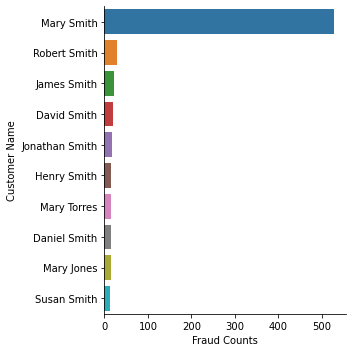

In [36]:
fraud_ranks = pd.DataFrame({'Customer Name':fraud_counts.index[range(10)],
                            'Fraud Counts':fraud_counts.iloc[range(10)]})
sns.catplot(y='Customer Name',x='Fraud Counts',
            data=fraud_ranks, kind = 'bar',height = 5)
plt.savefig('Fradulent Customers')

In [37]:
total_data[total_data['Customer Full Name'] == "Mary Smith"][['Customer Country','Customer Segment','Customer City']].value_counts()

Customer Country  Customer Segment  Customer City
Puerto Rico       Consumer          Caguas           4282
                  Corporate         Caguas           2524
                  Home Office       Caguas           1666
EE. UU.           Consumer          Chicago           315
                  Corporate         Los Angeles       283
                                                     ... 
                  Consumer          Methuen             2
                  Home Office       Provo               2
                  Corporate         Sacramento          2
                  Consumer          Crystal Lake        2
                  Home Office       Hanover             1
Length: 662, dtype: int64

Someone named Mary Smith has had 528 counts of fraud!!

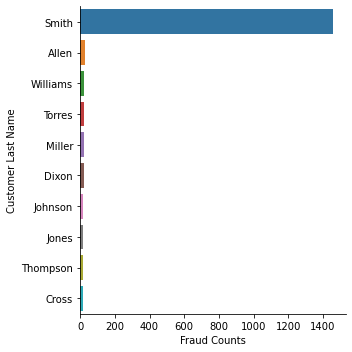

In [38]:
fraud_last = fraud_orders['Customer Lname'].value_counts()
fraud_ranks_lname = pd.DataFrame({'Customer Last Name':fraud_last.index[range(10)],
                            'Fraud Counts':fraud_last.iloc[range(10)]})
sns.catplot(y='Customer Last Name',x='Fraud Counts',
            data=fraud_ranks_lname, kind = 'bar',height=5)
plt.savefig("Fraudulent Customers by Last name")

In [39]:
train_data = total_data.copy()

In [40]:
total_data['Order Status'].apply(lambda x: 1 if x=="SUSPECTED_FRAUD" else 0)

0         0
1         0
2         0
3         0
4         0
         ..
180514    0
180515    0
180516    0
180517    0
180518    0
Name: Order Status, Length: 180519, dtype: int64

In [41]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

I chose Logisticregression and DecisionTreeClassifier (importance/ significance can be extracted if they yield good results).

In [42]:
fraud_orders.columns

Index(['Unnamed: 0', 'Order Id', 'Order Item Cardprod Id', 'Order Customer Id',
       'Order Department Id', 'Market', 'Order City', 'Order Country',
       'Order Region', 'Order State', 'Order Status', 'Order Zipcode',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Quantity', 'Sales', 'Order Item Total', 'Order Profit',
       'Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Delivery Status', 'Late Delivery Risk', 'Product Card Id',
       'Product Category Id', 'Product Name', 'Product Price',
       'Product Status', 'Category Id', 'Category Name', 'Department Id',
       'Department Name', 'Customer Id', 'Customer City', 'Customer Country',
       'Customer Fname', 'Customer Lname', 'Customer Segment',
       'Customer State', 'year', 'month', 'day', 'hour', 'Customer Full Name'],
      dtype='object')

#### Selected Features:
Market, Order Item Discount, profits, order item total, Days for shipping real and scheduled, Late Delivery Risk, Product Category ID, Customer ID (count of total orders), Customer Country, year,month, day, hour

In [43]:
order_amount_cust = total_data.groupby(by='Customer Id').count()['Order Id']

In [44]:
order_amount_cust.value_counts()

1     8435
11     737
14     706
12     696
10     686
9      657
13     651
15     640
16     613
8      613
17     570
7      534
18     495
6      473
19     452
5      450
20     422
21     337
4      311
22     277
23     243
3      236
24     232
25     201
2      176
26     154
28     122
27     117
29      84
30      68
31      65
32      46
33      36
34      26
36      19
35      18
38      12
37      10
39       9
42       7
43       4
40       4
44       3
45       2
41       2
47       1
Name: Order Id, dtype: int64

In [45]:
total_data = pd.merge(left = total_data,
         right = order_amount_cust,
        how= 'inner',
        left_on='Customer Id',
        right_index =True)

In [46]:
total_data.columns

Index(['Unnamed: 0', 'Order Id_x', 'Order Item Cardprod Id',
       'Order Customer Id', 'Order Department Id', 'Market', 'Order City',
       'Order Country', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Order Item Discount', 'Order Item Discount Rate',
       'Order Item Id', 'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit', 'Type', 'Days for shipping (real)',
       'Days for shipment (scheduled)', 'Delivery Status',
       'Late Delivery Risk', 'Product Card Id', 'Product Category Id',
       'Product Name', 'Product Price', 'Product Status', 'Category Id',
       'Category Name', 'Department Id', 'Department Name', 'Customer Id',
       'Customer City', 'Customer Country', 'Customer Fname', 'Customer Lname',
       'Customer Segment', 'Customer State', 'year', 'month', 'day', 'hour',
       'Customer Full Name', 'Order Id_y'],
      dtype='object')

In [47]:
total_data.rename(columns={"Order Id_y":"Customer Order Count"},inplace=True)
total_data['Type'] = total_data['Type'].apply(lambda x: 0 if x!='TRANSFER' else 1)

In [48]:
encode_cols = ['Market','Order City','Order Country','Order Region','Order State','Customer City','Customer Country',
              'Customer Segment','Customer State','Delivery Status']
already_encoded = ['Order Item Cardprod Id','Order Deparment Id','Order Item Id',
                   'Type','Late Delivery Risk','Product Category Id','Product Status'
]
not_needed = ['Unnamed: 0','Order Id_x','Order Customer Id','Order Zipcode','Order Item Id'
             ,'Product Card Id','Product Name','Category Id','Category Name','Department Id',
             'Department Name','Customer Id','Customer Fname','Customer Lname','Customer Full Name']

In [49]:
train_data = total_data.copy()

In [50]:
train_data=train_data.drop(not_needed,axis=1).drop('Order Status',axis=1)

In [51]:
train_data_num = train_data[train_data.columns[~train_data.columns.isin(encode_cols+already_encoded)]]

In [52]:
num_cols = train_data_num.columns
scaler = StandardScaler()
train_data_num = pd.DataFrame(scaler.fit_transform(train_data_num))
train_data_num.columns = num_cols
for col in num_cols:
    train_data[col] = train_data_num[col]

In [53]:
le = preprocessing.LabelEncoder()

In [54]:
for col_name in encode_cols:
    train_data[col_name] = le.fit_transform(train_data[col_name])

In [55]:
y = total_data['Order Status'].apply(lambda x: 0 if x != "SUSPECTED_FRAUD" else 1)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y,
                                                    stratify=y, 
                                                    test_size=0.2)

In [57]:
model_LR = LogisticRegression(max_iter = 1000)
model_LR.fit(X_train,y_train)
pred = model_LR.predict(X_test)


C:\Users\myung\anaconda3\envs\data_open\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     35292
           1       0.49      0.11      0.18       812

    accuracy                           0.98     36104
   macro avg       0.73      0.55      0.58     36104
weighted avg       0.97      0.98      0.97     36104



In [59]:
model2 = DecisionTreeClassifier()
model2.fit(X_train,y_train)
pred2 = model2.predict(X_test)

In [60]:
print(classification_report(y_test,pred2))
print(confusion_matrix(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35292
           1       0.87      0.88      0.88       812

    accuracy                           0.99     36104
   macro avg       0.93      0.94      0.94     36104
weighted avg       0.99      0.99      0.99     36104

[[35184   108]
 [   96   716]]


In [61]:
importances=model2.feature_importances_

In [62]:
x_catplot = X_train.columns[importances.argsort()]
y_catplot= np.sort(importances)[::-1]
importance_df = pd.DataFrame({"Feature":x_catplot, "Importance":y_catplot})

In [63]:
x_catplot

Index(['Product Status', 'Type', 'Late Delivery Risk', 'Sales',
       'Order Department Id', 'Customer Country', 'Order Item Cardprod Id',
       'Order Item Quantity', 'Product Category Id',
       'Order Item Discount Rate', 'Order Item Discount', 'Product Price',
       'year', 'Market', 'Order Item Total', 'Order Profit',
       'Days for shipment (scheduled)', 'Customer Segment', 'Order Region',
       'Days for shipping (real)', 'month', 'Customer State', 'Customer City',
       'Order Country', 'hour', 'day', 'Order State', 'Customer Order Count',
       'Order City', 'Delivery Status'],
      dtype='object')

<Figure size 432x288 with 0 Axes>

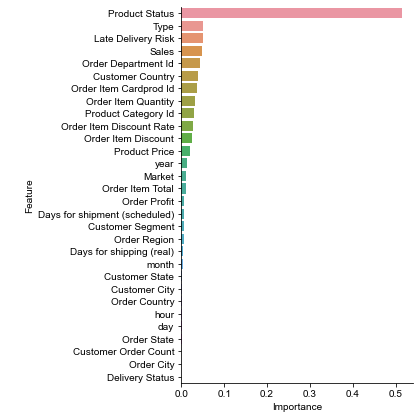

In [64]:
plt.subplots_adjust(hspace = 20)
sns.catplot(x='Importance',y='Feature',data = importance_df, kind = 'bar', height=6)
sns.set(rc={'figure.figsize':(12,5)})
plt.tight_layout()

plt.savefig('Decision Tree Feature Importances')

In [65]:
model2.classes_

array([0, 1], dtype=int64)

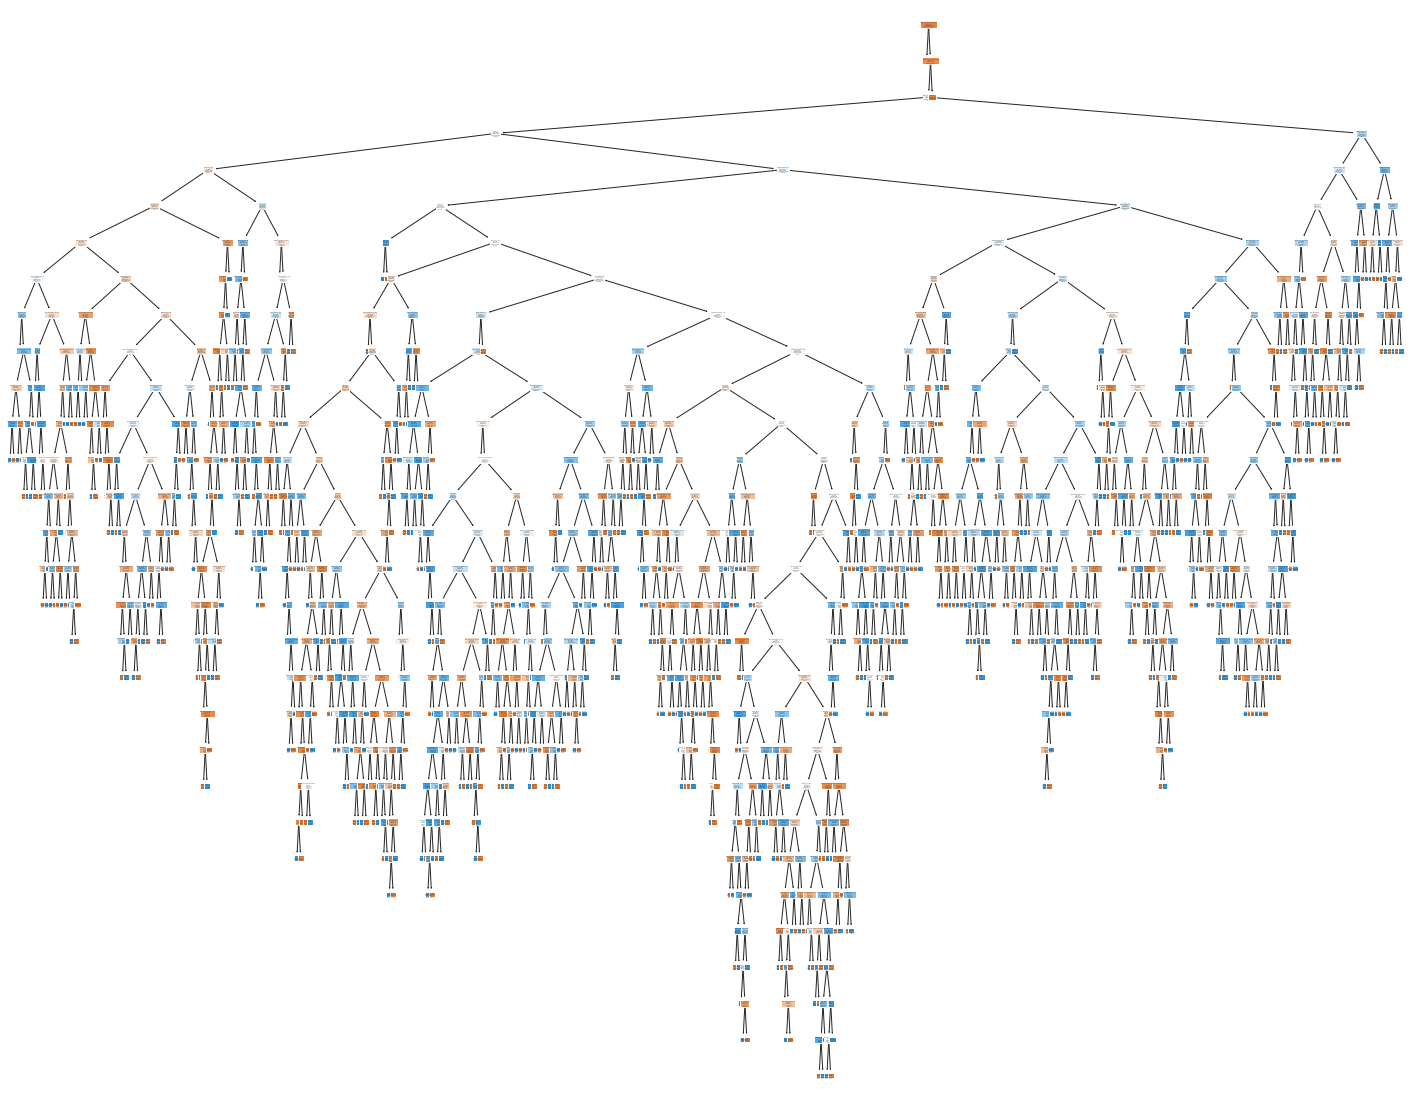

In [66]:
import graphviz
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model2, 
                   feature_names=x_catplot,  
                   class_names=str(model2.classes_),
                   filled=True)

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
model_Rf = RandomForestClassifier()

In [69]:
model_Rf.fit(X_train,y_train)

RandomForestClassifier()

In [70]:
pred_Rf = model_Rf.predict(X_test)

In [71]:
print(classification_report(y_test,pred_Rf))
print(confusion_matrix(y_test,pred_Rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35292
           1       0.93      0.86      0.89       812

    accuracy                           1.00     36104
   macro avg       0.96      0.93      0.94     36104
weighted avg       1.00      1.00      1.00     36104

[[35238    54]
 [  115   697]]


In [72]:
importances_Rf=model_Rf.feature_importances_

In [75]:
x_catplot_Rf = X_train.columns[importances_Rf.argsort()]
y_catplot_Rf= np.sort(importances_Rf)[::-1]
importance_df_Rf = pd.DataFrame({"Feature":x_catplot_Rf, "Importance":y_catplot_Rf})

<Figure size 864x360 with 0 Axes>

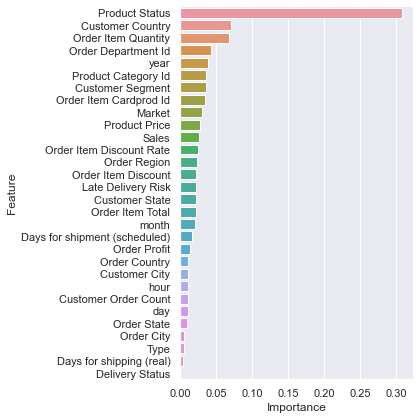

In [76]:
plt.subplots_adjust(hspace = 20)
sns.catplot(x='Importance',y='Feature',data = importance_df_Rf, kind = 'bar', height=6)
sns.set(rc={'figure.figsize':(12,5)})
plt.tight_layout()

plt.savefig('Random Forest Feature Importances')